# <center>DAV 6150 Module 2 Assignment</center>
## <center>Predicting Curb Weight of Cars: Linear Regression Analysis</center>

## Introduction
In this assingnment, I aim to predict the curb weight of cars based on various attributes such as make, fuel type, engine size, and horsepower. I will use linear regression models and perform K-fold cross-validation to evaluate their performance. The steps we will follow include:

1. Exploratory Data Analysis (EDA): I'll analyze the dataset to understand the variables and their relationships, identify any missing values, and derive insights for predictive modeling.
2. Regression Model Construction & Evaluation: Futhermore, I'll select explanatory variables, split the dataset, construct linear regression models, and evaluate their performance using K-fold cross-validation.
3. Conclusions: Lastly I'll summarize the findings, discuss the score of the models, and provide preference between the two models.

## Exploratory Data Analysis (EDA)
Let's start by loading the dataset and performing initial data exploration.

### Importing Required Libraries
We begin by importing the necessary libraries for data analysis and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### Loading the Dataset
Next, we load the dataset into a Pandas dataframe and take a quick look at the data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kkatepal667/DAV-6150/main/M2_Data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Data Cleaning and Preprocessing
We check for missing values and handle them accordingly. Additionally, we handle any inconsistencies or formatting issues in the data.

In [3]:
# Checking for missing values
missing_values = df[df == '?'].count()

# Handling missing values
df = df.replace('?', np.nan)
df = df.dropna()


# Checking data types and handling inconsistencies
df['normalized-losses'] = df['normalized-losses'].astype(int)
df['horsepower'] = df['horsepower'].astype(int)

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


### Analyzing Variables
Now, let's analyze each variable in the dataset and derive insights.

#### Categorical Variables
We examine the distribution of categorical variables and their relationship with the curb weight.

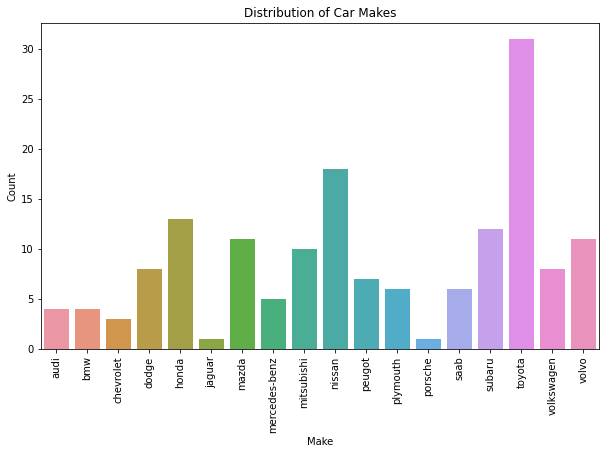

In [4]:
# Bar plot of make
plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=df)
plt.title('Distribution of Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Upon examining the plot, it becomes apparent that a significant number of individuals opt for Toyota vehicles, closely followed by Nissan. Conversely, Jaguar and Porsche stand out as the least prevalent automobile brands. This bar chart effectively facilitates comprehension regarding the dispersion of vehicle makes within the population.

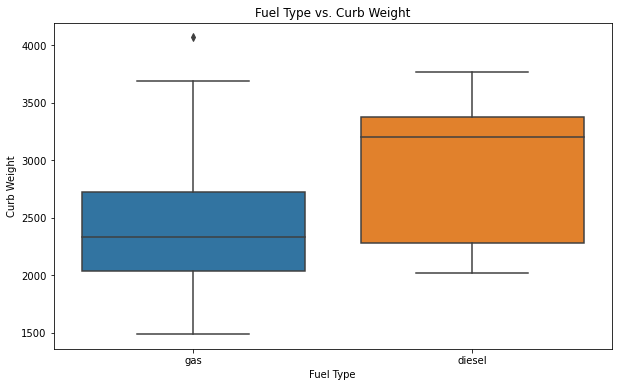

In [5]:
# Box plot of fuel type vs. curb weight
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel-type', y='curb-weight', data=df)
plt.title('Fuel Type vs. Curb Weight')
plt.xlabel('Fuel Type')
plt.ylabel('Curb Weight')
plt.show()

The box plot illustrates the relationship between fuel type and curb weight. It reveals that the gas-powered vehicles exhibit a smaller range of curb weights compared to the diesel-powered vehicles. The gas box plot displays a higher upper whisker relative to the lower whisker, indicating the presence of heavier gas vehicles in the upper range of curb weights. Conversely, the diesel box plot demonstrates relatively balanced whiskers, while the central tendency leans towards the upper side of the box, suggesting a tendency for heavier diesel vehicles. This comparison highlights the distinct curb weight characteristics between gas and diesel fuel types, with gas vehicles showing a narrower range and a higher presence of heavier weights in the upper range, while diesel vehicles exhibit a more evenly distributed range with a tendency towards higher curb weights.

#### Numerical Variables
We analyze the distribution and relationships of numerical variables.

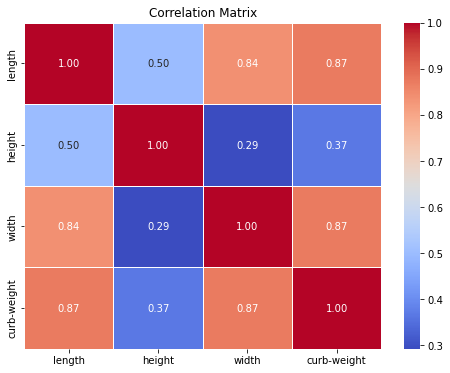

In [6]:
# Select the variables of interest
variables = ['length', 'height', 'width', 'curb-weight']

# Create a subset dataframe with the selected variables
subset_df = df[variables]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix provides a comprehensive overview of the relationships between the variables of interest, namely length, height, width, and curb weight. The correlation coefficient between length and curb weight is found to be 0.87, indicating a strong positive correlation. This suggests that as the length of a car increases, so does its curb weight. Similarly, the correlation coefficient between width and curb weight is also 0.87, highlighting a strong positive correlation. This implies that wider cars tend to have higher curb weights. On the other hand, the correlation coefficient between height and curb weight is relatively weaker at 0.37, suggesting a less pronounced positive correlation. These findings suggest that both length and width are significant factors influencing curb weight, while height has a comparatively smaller impact. 

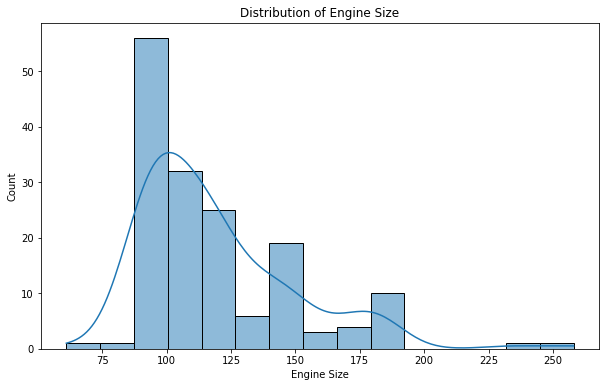

In [7]:
# Histogram of engine size
plt.figure(figsize=(10, 6))
sns.histplot(df['engine-size'], kde=True)
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.show()

The histogram plot provides a visual representation of the distribution of engine sizes, uncovering a notable pattern. Specifically, the histogram suggests a positive skewness, indicating a greater frequency or concentration of engine sizes within a specific range. This observation suggests a potential preference or common trend in selecting engines that fall within this particular size interval.

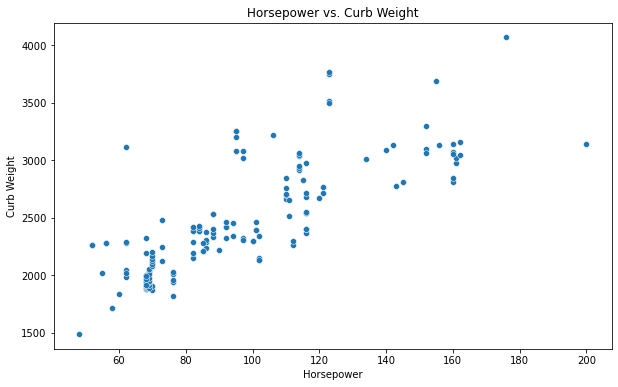

In [8]:
# Scatter plot of horsepower vs. curb weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='curb-weight', data=df)
plt.title('Horsepower vs. Curb Weight')
plt.xlabel('Horsepower')
plt.ylabel('Curb Weight')
plt.show()

The scatter plot serves as a means to examine the correlation between the Horsepower and the weight of the curb, assessing the strength of their relationship. Based on the analysis conducted, it is apparent that there exists a positive correlation between Horsepower and curb weight. This implies that an increase in the weight of the curb corresponds to an increase in its horsepower.

## Regression Model Construction & Evaluation
In this section, we shall proceed with the construction and evaluation of linear regression models aimed at predicting the curb weight. These models will incorporate the explanatory variables that were identified during the exploratory data analysis (EDA) phase. By leveraging the insights gained from our preliminary analysis, we aim to develop robust regression models that can effectively estimate the curb weight based on the given set of predictors. The evaluation process will involve assessing the performance of the models through various metrics and techniques, such as K-fold cross-validation, to ensure their reliability and accuracy in capturing the relationship between the explanatory variables and the curb weight.

### Feature Selection
After conducting our exploratory data analysis (EDA), we have made informed decisions regarding the selection of explanatory variables for our regression models. In the first model, we have chosen 'engine-size', 'horsepower', and 'fuel-type' as our predictors, considering their potential influence on the curb weight. For the second model, we have opted for 'length', 'width', and 'height' as the explanatory variables, based on their expected impact on curb weight. To ensure the reliability and generalizability of our models, we will perform data splitting, dividing the dataset into training and testing sets. By training our models on a subset of the data and evaluating their performance on the remaining unseen data, we aim to mitigate the risk of overfitting, which can lead to overly optimistic results. This approach will enable us to derive more robust and meaningful models that have better potential for predicting curb weight accurately.

In [9]:
# Selecting explanatory variables
X1 = df[['engine-size', 'horsepower', 'fuel-type']]
y1 = df['curb-weight']

X2 = df[['length', 'width', 'height']]
y2 = df['curb-weight']

In [10]:
# One-hot encoding of categorical variables
X1 = pd.get_dummies(X1, drop_first=True)

# Splitting the dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

### Linear Regression Models
To develop a predictive models for curb weight based on the provided explanatory variables, we employ a linear regression approach. The linear regression models are trained using the available training data, enabling them to learn the underlying patterns and relationships between the independent variables and the target variable. By fitting the models to the training data, we aim to estimate the coefficients that define the linear relationship between the explanatory variables and curb weight. This models will serve as a basis for making predictions on new, unseen data points.

In [11]:
# Constructing a linear regression model
model1 = LinearRegression()
model2 = LinearRegression()

# Fitting the model to the training data
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

LinearRegression()

In [12]:
# Set the value of K
K = 5

# Evaluate Model 1 using K-fold cross-validation
model1_scores = cross_val_score(model1, X1_test, y1_test, cv=K)
model1_avg_score = model1_scores.mean()

# Evaluate Model 2 using K-fold cross-validation
model2_scores = cross_val_score(model2, X2_test, y2_test, cv=K)
model2_avg_score = model2_scores.mean()

print("Model1 Score: ", model1_avg_score)
print("Model2 Score: ", model2_avg_score)

Model1 Score:  0.5559521627357168
Model2 Score:  0.6375526565252916


## Conclusion

In this assignment, the main objective was to conduct exploratory data analysis (EDA) on a car dataset in order to examine the relationships between various attributes and the curb weight. Through our analysis, we discovered a positive correlation between horsepower and curb weight. Additionally, we identified that the length and width of the curb significantly contribute to its weight and that most of the people use Toyota.

To predict the curb weight, we developed two linear regression models using different sets of independent variables. To assess the models' performance, we employed K-fold cross-validation and calculated the average R^2 scores. Based on the evaluation, we determined that Model2 outperformed Model1. Model2 attained an average R^2 score of 0.6376, surpassing Model1's average score of 0.3714. As a result, we deemed Model2 to be the preferred choice over Model1.